In [34]:
# import libraries

import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
df= pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [48]:
df.shape

(768, 9)

In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [33]:
df.duplicated().sum()

np.int64(0)

From the above data exploration analysis we find that:
- there are 9 cols and 768 rows.
- There is no NULL values in the dataset.
- Looks like there is outliers in many cols.
- No duplicated record
- All columns data type either int or float.
- The data need to be standarized.

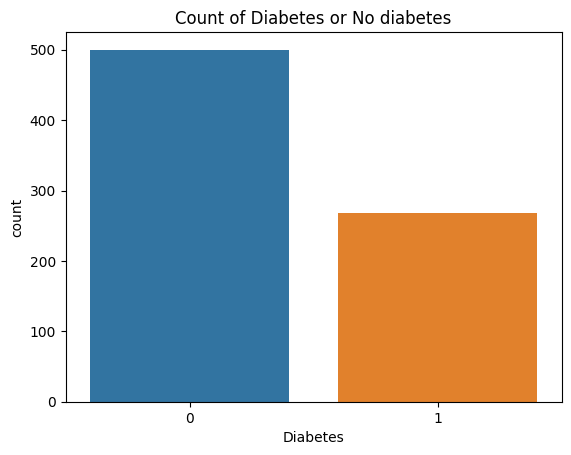

In [47]:
sns.countplot(x='Outcome', data=df, hue='Outcome', legend=False)
plt.title('Count of Diabetes or No diabetes')
plt.xlabel('Diabetes')
plt.show()

In [42]:
no_diabetes = round((len(df[df['Outcome']== 0]) / len(df)) * 100,2)
with_diabetes = round((len(df[df['Outcome']== 1]) / len(df)) * 100, 2)
print(f'percentage of no_diabetes = {no_diabetes}')
print(f'percentage of with_diabetes = {with_diabetes}')

percentage of no_diabetes = 65.1
percentage of with_diabetes = 34.9


- The outcome is not balanced. It's biase to no_diabetes.

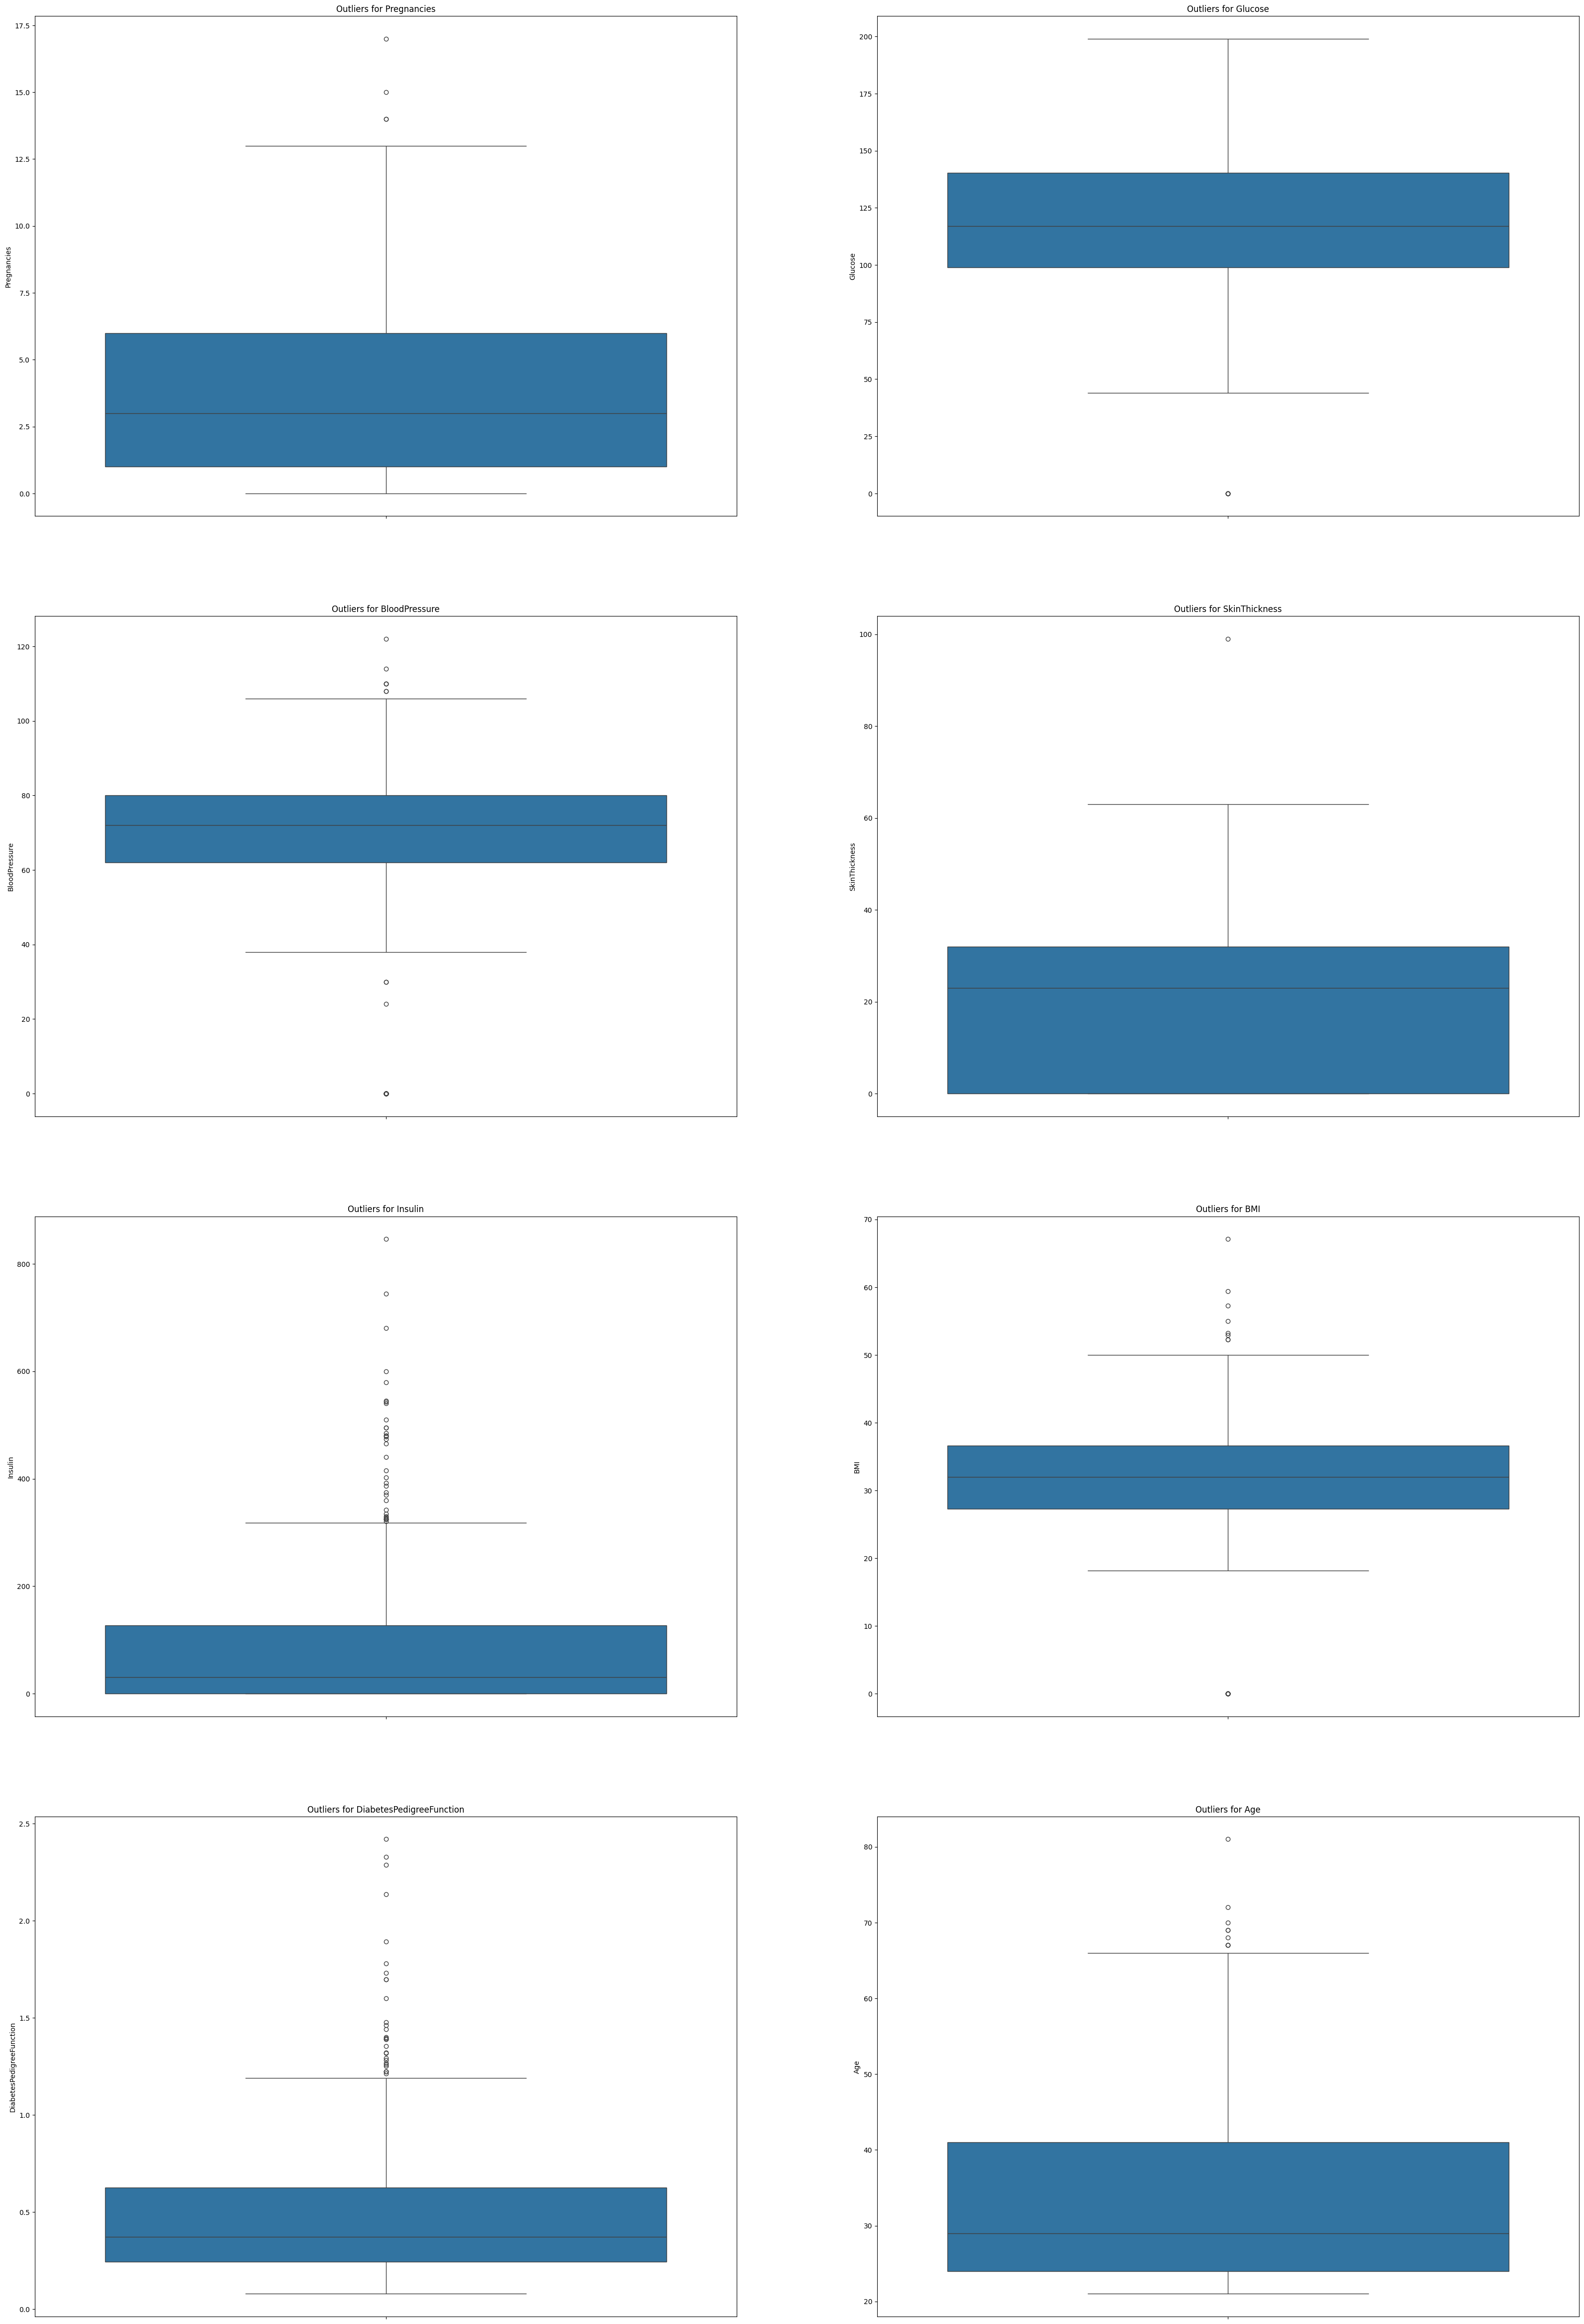

In [60]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(40,60))
axes = axes.flatten()
df_col = df.drop('Outcome', axis=1)

for ax, column in zip(axes, df_col.columns):
    sns.boxplot(y=df[column], ax=ax)
    ax.set_title(f'Outliers for {column}')

plt.show()